Secondary structure drawing styles
==================================

Here I will explain the styles available to plot secondary structure drawings.
The function syntax is likely to stay the same, but the appearance of plots may
change in the future.

For an explaination of the plotting API, see "Plotting API" page.

For brevity, I will refer to secondary structure drawings as "ss plots".

Notebook set-up
---------------

In [1]:
%matplotlib inline
import rnavigate as MaP
MaP.create_code_button()

Initializing MaP sample
-----------------------

In [2]:
path = 'data/'
def return_sample(sample):
    return MaP.Sample(sample = sample,
                      profile = path+sample+"_rnasep_profile.txt",
                      ct = path+"RNaseP.ct",
                      ss = path+"RC_CRYSTAL_STRUCTURE.xrna",
                      rings = path+sample+"-rnasep.corrs",
                      pairs = path+sample+"-rnasep-pairmap.txt",
                      log = path+sample+"_shapemapper_log.txt",
                      dance_prefix = path+sample+"_rnasep",
                      deletions = path+"example-rnasep-deletions.txt",
                      fasta = path+"RNaseP-noSC.fasta",
                      pdb = path+"3dhs_Correct.pdb",
                      pdb_kwargs = {"chain":"A"})


example = return_sample("example2")

Nucleotide coloring options
---------------------------

There are three built-in coloring schemes for ss plots. These are specified
using the `colors=` option.

"sequence" (default)

* A: dark blue
* U: light blue
* G: dark red
* C: light red

"profile"

* High reactivity: red
* Medium reactivity: yellow/orange
* Low reactivity: black
* Masked or negative: grey

"position"

* Rainbow gradient from:
* first nucleotide: dark violet
* last nucleotide: dark red

"structure"

* base-paired: blue
* single-stranded: orange

We can also apply custom colors with the `colors` option. Either a single valid
matplotlib color, or a list of matplotlib colors. Here's the matplotlib tutorial for
[specifying colors](https://matplotlib.org/stable/tutorials/colors/colors.html).
We also have the function `get_colors_list` to make coloring regions a little easier.

Nucleotide coloring styles
--------------------------

In addition to specifying the colors used to display the secondary structure,
you can specify which part of the plot to apply these colors to using the
`apply_color_to=` option. There are currently three styles to choose from:

"background" (default)

* Closed circles are colored and connected by a grey backbone.

"sequence"

* Sequence letters are colored and connected by a grey backbone.

"structure"

* The backbone line is colored according to the nearest nucleotide position.

These styles are access via the `apply_color_to=` option.

In the plot below, the title is set to the syntax for the example.make_ss() API.
You can use the same options with example.make_ss_multifilter() and MaP.array_ss()

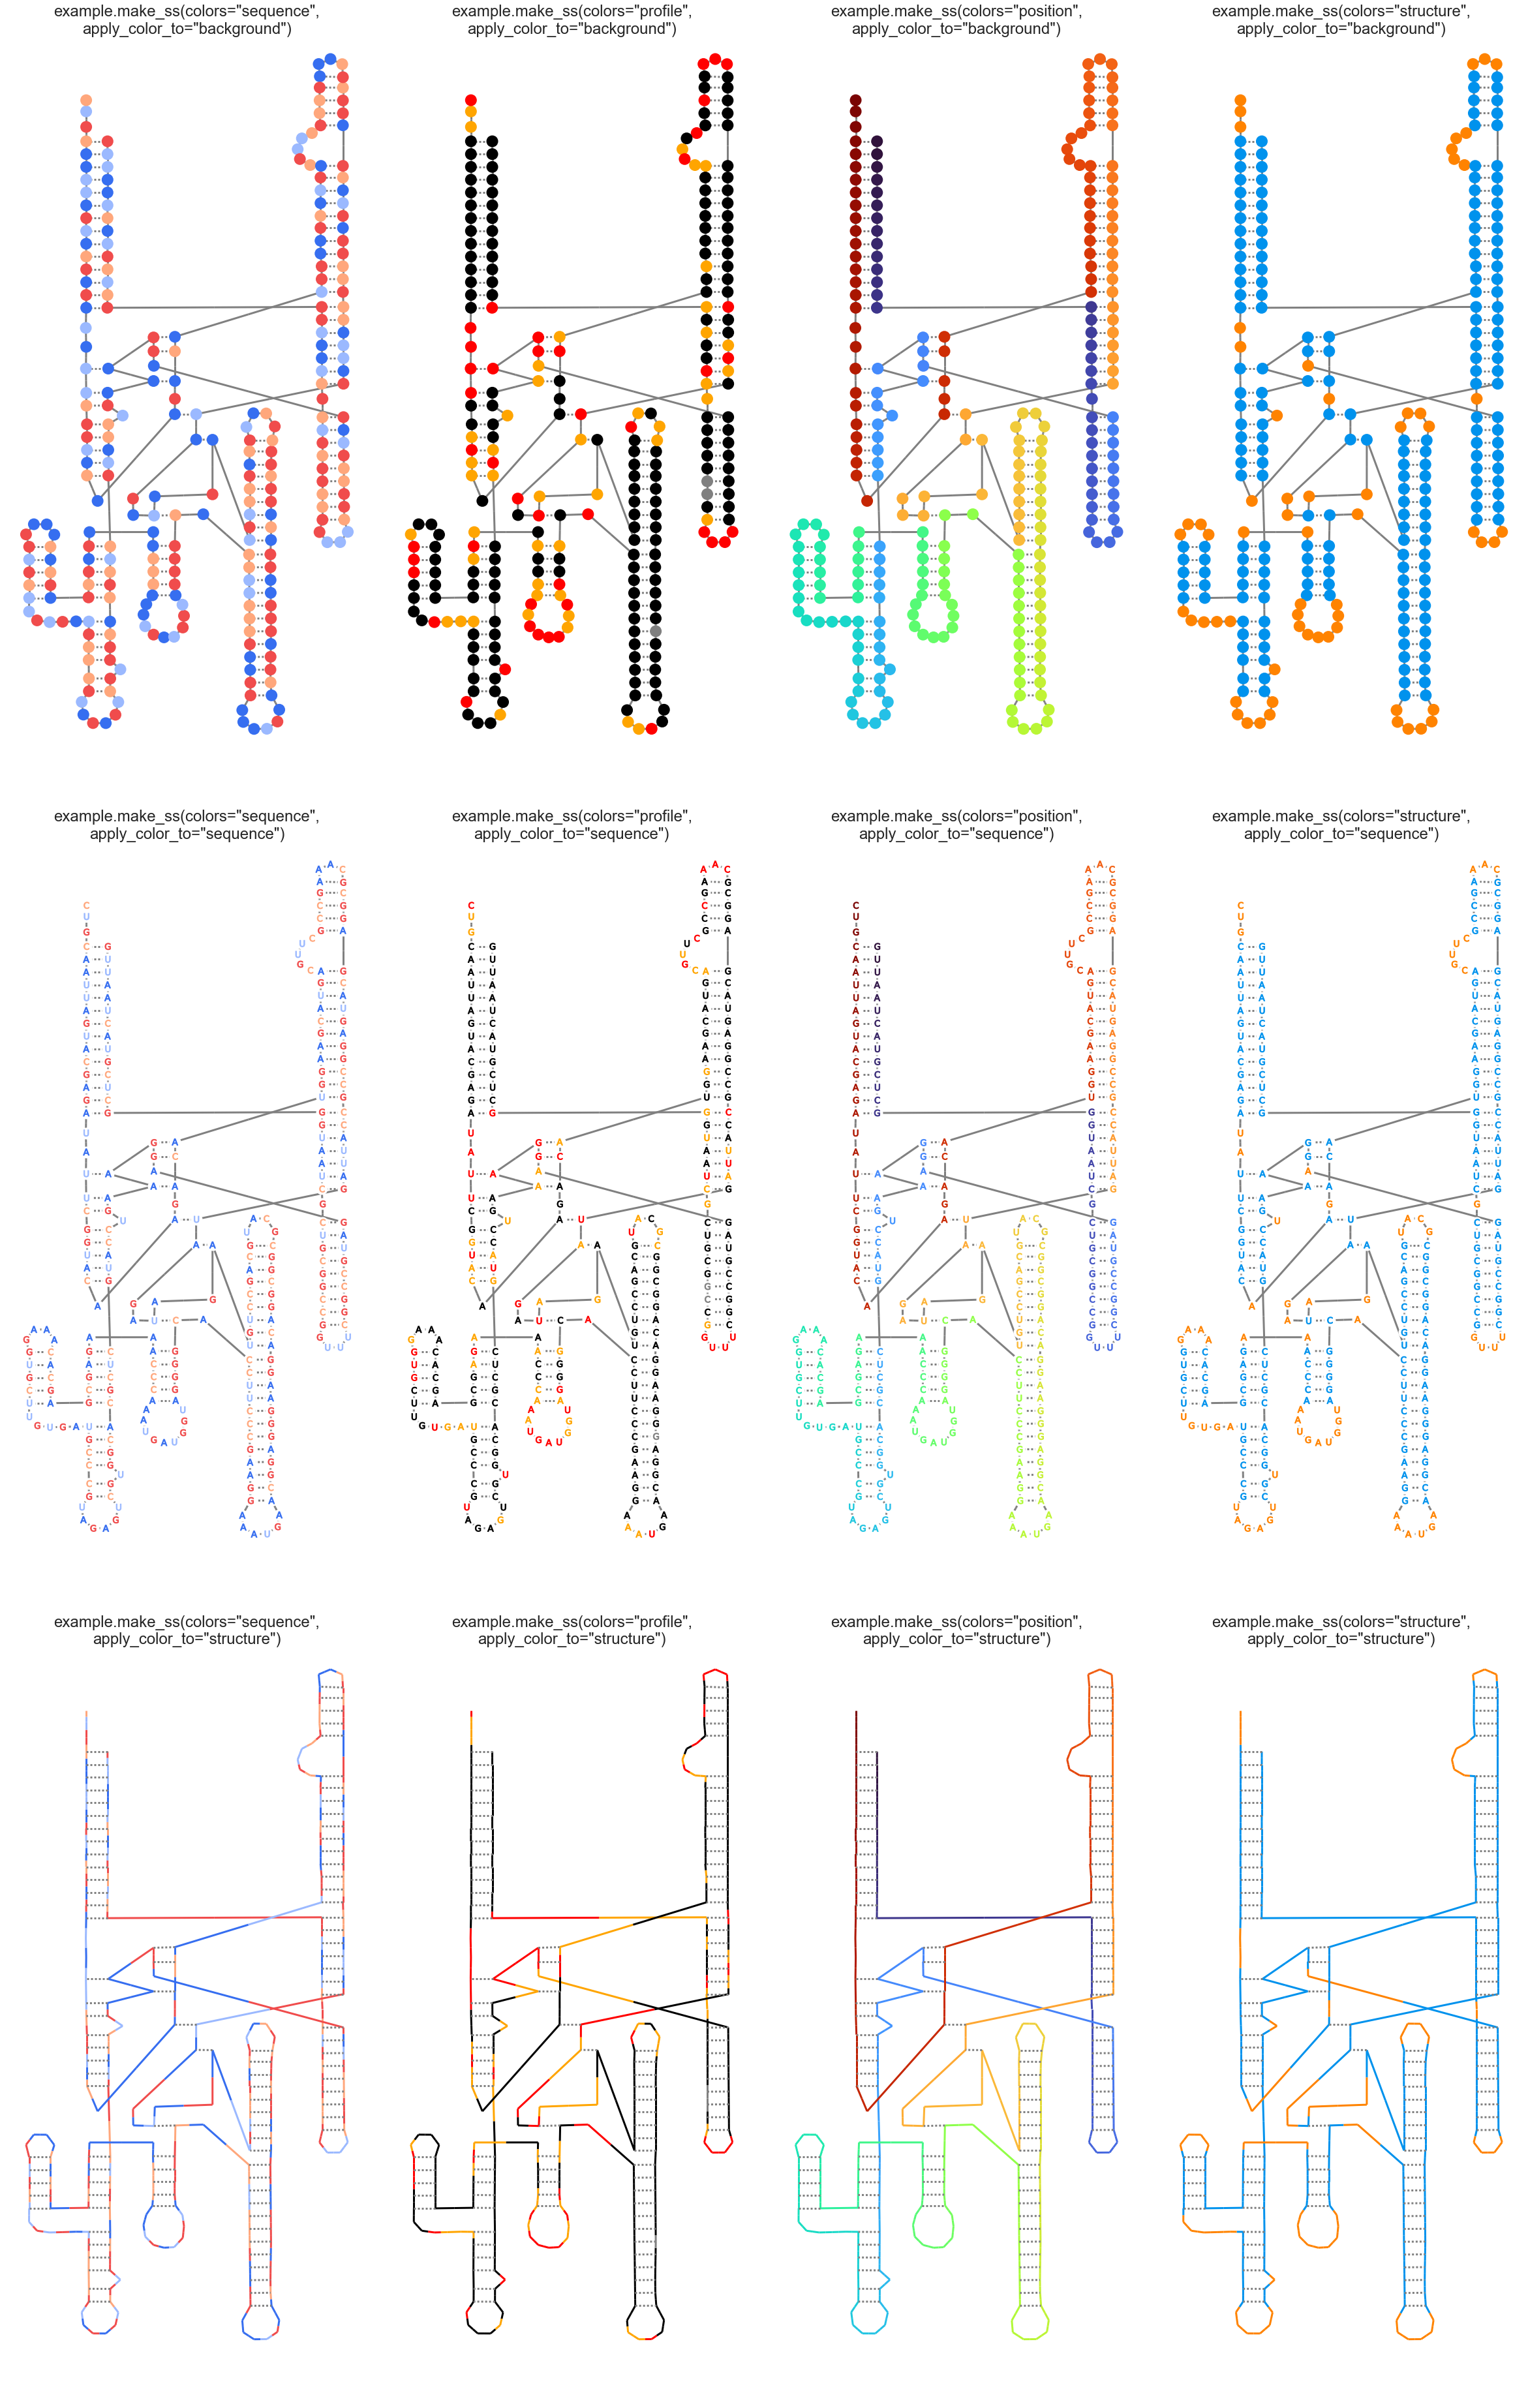

In [3]:
plot = MaP.plots.SS(num_samples=12, structure=example.data["ss"])
kwargs = {"ij": None, "ij2": None, "profile": example.data["profile"]}
colors = ["sequence", "profile", "position", "structure"]
apply_color_tos = ["background", "sequence", "structure"]
for act in apply_color_tos:
    for c in colors:
        label = f'example.make_ss(colors="{c}",\napply_color_to="{act}")'
        plot.plot_data(colors=c, apply_color_to=act, label=label, **kwargs)